## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = mouse_df[mouse_df["Mouse ID"] == "g989"]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_full = mouse_df.drop(duplicated.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_full["Mouse ID"].nunique()

248

In [7]:
import seaborn as sns

## Summary Statistics

In [8]:
mouse_full.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = mouse_full.groupby(["Drug Regimen"])
drug_mean = drug_group.mean()["Tumor Volume (mm3)"]
drug_median = drug_group.median()["Tumor Volume (mm3)"]
drug_var = drug_group.var()["Tumor Volume (mm3)"]
drug_std = drug_group.std()["Tumor Volume (mm3)"]
drug_sem = drug_group.sem()["Tumor Volume (mm3)"]

drug_summary = pd.DataFrame({"Mean":drug_mean, "Median":drug_median, "Variance":drug_var, 
             "Standard Dev": drug_std, "SEM":drug_sem})
drug_summary

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mouse_full.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

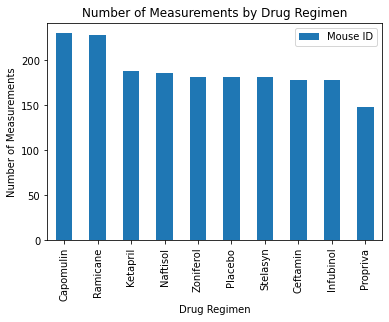

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group.agg({"Mouse ID":"count"}).sort_values("Mouse ID", ascending=False).plot(kind='bar',
                                                                                  title="Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen");

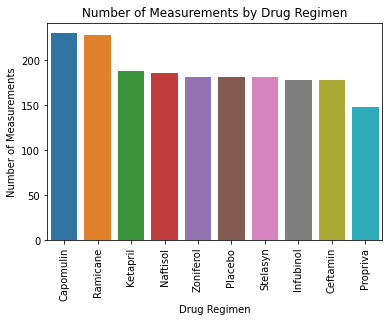

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
sns.countplot(data=mouse_full, x="Drug Regimen",
             order= mouse_full["Drug Regimen"].value_counts().index)

plt.title("Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.show()

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_rbymouse = drug_group.count()["Mouse ID"]
drug_rbymouse = drug_rbymouse.reset_index()
drug_rbymouse = drug_rbymouse.sort_values("Mouse ID", ascending=False)

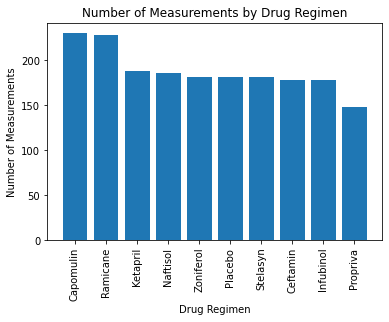

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_rbymouse["Drug Regimen"], drug_rbymouse["Mouse ID"])

plt.xticks(rotation=90)
plt.title("Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

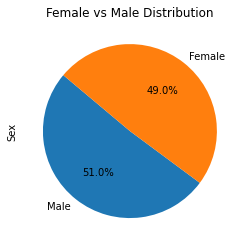

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_full["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=140)

plt.title("Female vs Male Distribution")

plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = mouse_full.groupby(["Sex"]).count()["Mouse ID"]
gender_group = gender_group.reset_index()
gender_group

,Sex,Mouse ID
0,Female,922
1,Male,958


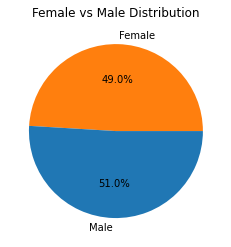

In [17]:
plt.pie(gender_group["Mouse ID"], labels= gender_group["Sex"], autopct= "%1.1f%%",
       colors=["#FF7F0E", "#2077B4"])

plt.title("Female vs Male Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
mouse_full

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens Sort DF:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_dataframe = mouse_full[mouse_full["Drug Regimen"].isin(drug_list)]
drugs_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [31]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = drugs_dataframe.groupby(["Mouse ID"]).max()["Timepoint"]
max_time = max_time.reset_index()
max_time

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [33]:
# Merge this group df with the original dataframe to get the tumor volume at the Mouse ID & last timepoint 
drugs_df = pd.merge(drugs_dataframe, max_time, on=["Mouse ID", "Timepoint"])
drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = drugs_df.loc[drugs_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(drug_data)
    
    # add subset 
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    outliers = drug_data[(drug_data > upper_bound) | (drug_data < lower_bound)]
    
    print(outliers)    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


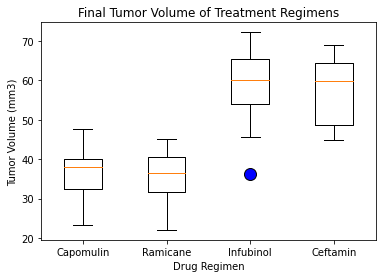

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker="o", markerfacecolor='blue', markersize=12,
                  linestyle='none')

fig, ax1 = plt.subplots()

ax1.boxplot(tumor_vol, labels= drug_list, flierprops=flierprops)
ax1.set_title("Final Tumor Volume of Treatment Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show()

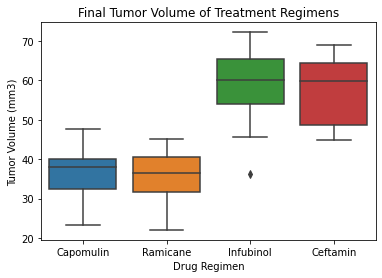

In [54]:
fig, ax1 = plt.subplots()

sns.boxplot(y=tumor_vol, x=drug_list)

ax1.set_title("Final Tumor Volume of Treatment Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [85]:
capo_df = drugs_dataframe[drugs_dataframe["Drug Regimen"] == "Capomulin"]
m_s2185 = capo_df[capo_df["Mouse ID"] == "s185"]
mouse_info = m_s2185.groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
mouse_info = mouse_info.reset_index()
mouse_info

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


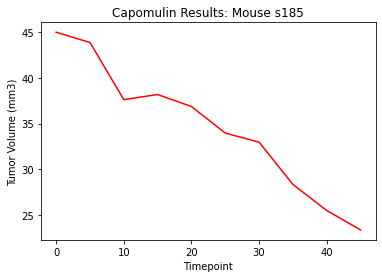

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"], color='red')
plt.title('Capomulin Results: Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
w_capo_group = capo_df.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]
w_capo_df = w_capo_group.reset_index()
w_capo_df

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [95]:
x_values = w_capo_df["Weight (g)"]
y_values = w_capo_df["Tumor Volume (mm3)"]

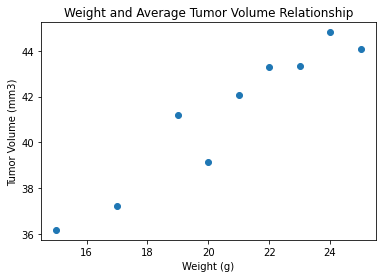

In [96]:
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.title("Weight and Average Tumor Volume Relationship")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

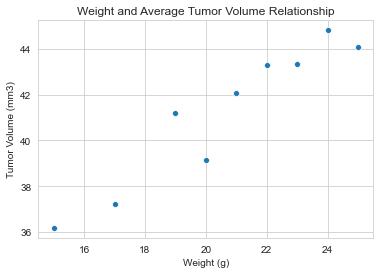

In [125]:
sns.set_style("whitegrid")
sns.scatterplot(x=x_values, y=y_values, )
plt.title("Weight and Average Tumor Volume Relationship");

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

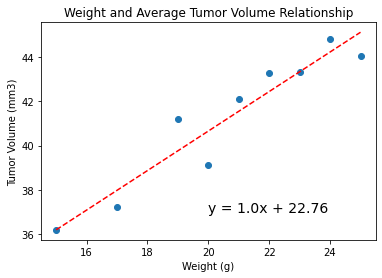

The correlation between both factors is: 0.95
The r2 of the model is: 0.9034966277438606


In [117]:
slope, intercept, rvalue, pvalue, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color='red', ls ='--')
plt.annotate(line_eq,(20, 37),fontsize=14)

plt.xlabel("Weight (g)")
plt.title("Weight and Average Tumor Volume Relationship")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
print(f"The correlation between both factors is: {round(rvalue,2)}")
print(f"The r2 of the model is: {(rvalue**2)}")

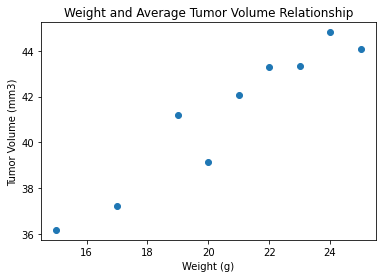

In [97]:
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.title("Weight and Average Tumor Volume Relationship")
plt.ylabel("Tumor Volume (mm3)")

plt.show()